In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
chi_payroll=pd.read_csv('https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Chicago%20-%20Citywide%20Payroll%20Data/Current_Employee_Names__Salaries__and_Position_Titles.csv')
print('First two rows')
print(chi_payroll.head(2))
print('===========')
print('Column Names')
print(chi_payroll.columns)
print('===========')
print('Data rows & columns')
print(chi_payroll.shape)
print('===========')
print('Count, mean etc of numerical value')
print(chi_payroll.describe())
print('===========')

First two rows
               Name  Job Titles Department Full or Part-Time Salary or Hourly  \
0  ALLISON,  PAUL W  LIEUTENANT       FIRE                 F           Salary   
1   BRUNO,  KEVIN D    SERGEANT     POLICE                 F           Salary   

   Typical Hours Annual Salary Hourly Rate  
0            NaN    $107790.00         NaN  
1            NaN    $104628.00         NaN  
Column Names
Index(['Name', 'Job Titles', 'Department', 'Full or Part-Time',
       'Salary or Hourly', 'Typical Hours', 'Annual Salary', 'Hourly Rate'],
      dtype='object')
Data rows & columns
(32658, 8)
Count, mean etc of numerical value
       Typical Hours
count    7883.000000
mean       34.698719
std         9.145553
min        10.000000
25%        20.000000
50%        40.000000
75%        40.000000
max        40.000000


In [5]:
print(chi_payroll.isnull().sum().sort_values(ascending=False))

Typical Hours        24775
Hourly Rate          24775
Annual Salary         7883
Name                     0
Job Titles               0
Department               0
Full or Part-Time        0
Salary or Hourly         0
dtype: int64


In [6]:
print(chi_payroll['Hourly Rate'].isnull().groupby(chi_payroll['Full or Part-Time']).sum())
print(chi_payroll['Typical Hours'].isnull().groupby(chi_payroll['Full or Part-Time']).sum())

Full or Part-Time
F    24770
P        5
Name: Hourly Rate, dtype: int64
Full or Part-Time
F    24770
P        5
Name: Typical Hours, dtype: int64


In [7]:
chi_payroll['Currency'],chi_payroll['Hourly Rate']=chi_payroll['Hourly Rate'].str.split('$',1).str
chi_payroll[['Hourly Rate']]=chi_payroll[['Hourly Rate']].astype(float)
chi_payroll['CurrencySalary'],chi_payroll['Annual Salary']=chi_payroll['Annual Salary'].str.split('$',1).str
chi_payroll[['Annual Salary']]=chi_payroll[['Annual Salary']].astype(float)
print(chi_payroll['Annual Salary'].dtype)

float64


<ipython-input-7-3dd13af7ebbc>:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  chi_payroll['Currency'],chi_payroll['Hourly Rate']=chi_payroll['Hourly Rate'].str.split('$',1).str
<ipython-input-7-3dd13af7ebbc>:3: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  chi_payroll['CurrencySalary'],chi_payroll['Annual Salary']=chi_payroll['Annual Salary'].str.split('$',1).str


In [8]:
print(chi_payroll.loc[(chi_payroll['Full or Part-Time'] == 'P') & (chi_payroll['Hourly Rate'].isnull())])

                        Name                 Job Titles    Department  \
2380   BLONSKI,  KATHERINE E            ALDERMANIC AIDE  CITY COUNCIL   
3051       BROWN,  BENJAMIN             ALDERMANIC AIDE  CITY COUNCIL   
3465        BURKE,  AUSTIN L  FIREFIGHTER-EMT (RECRUIT)          FIRE   
6573      DAVIS,  PATRICIA A            ALDERMANIC AIDE  CITY COUNCIL   
30592     WALLACE,  MARION S            ALDERMANIC AIDE  CITY COUNCIL   

      Full or Part-Time Salary or Hourly  Typical Hours  Annual Salary  \
2380                  P           Salary            NaN        18720.0   
3051                  P           Salary            NaN        10008.0   
3465                  P           Salary            NaN        56304.0   
6573                  P           Salary            NaN        13002.0   
30592                 P           Salary            NaN        19008.0   

       Hourly Rate Currency CurrencySalary  
2380           NaN      NaN                 
3051           NaN      Na

In [9]:
chi_payroll['Full or Part-Time'] = np.where(chi_payroll['Hourly Rate'].isnull(),'F','P')

In [10]:
chi_payroll['Hourly Rate'].fillna(0,inplace=True)
chi_payroll['Typical Hours'].fillna(0,inplace=True)

In [11]:
print(chi_payroll['Annual Salary'].isnull().groupby(chi_payroll['Full or Part-Time']).sum())

Full or Part-Time
F       0
P    7883
Name: Annual Salary, dtype: int64


In [12]:
chi_payroll['Annual Salary'].fillna(0,inplace=True)
print(chi_payroll.isnull().sum().sort_values(ascending=False))

Currency             24775
CurrencySalary        7883
Name                     0
Job Titles               0
Department               0
Full or Part-Time        0
Salary or Hourly         0
Typical Hours            0
Annual Salary            0
Hourly Rate              0
dtype: int64


/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Typical Hours', ylabel='Hourly Rate'>

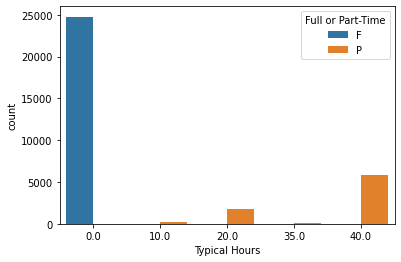

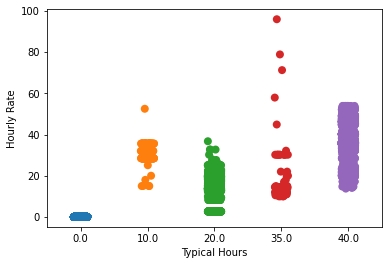

In [13]:
f1=plt.figure()
sns.countplot('Typical Hours',data=chi_payroll,hue='Full or Part-Time')
f2=plt.figure()
sns.stripplot(x='Typical Hours',y='Hourly Rate',data=chi_payroll,jitter=True,size=8)

<AxesSubplot:xlabel='Typical Hours', ylabel='Hourly Rate'>

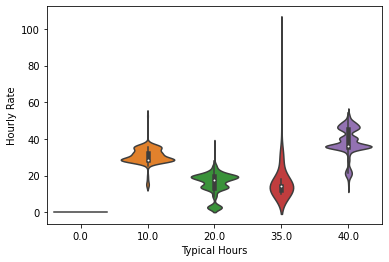

In [14]:
sns.violinplot(x='Typical Hours',y='Hourly Rate',data=chi_payroll)

/usr/local/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.9/site-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


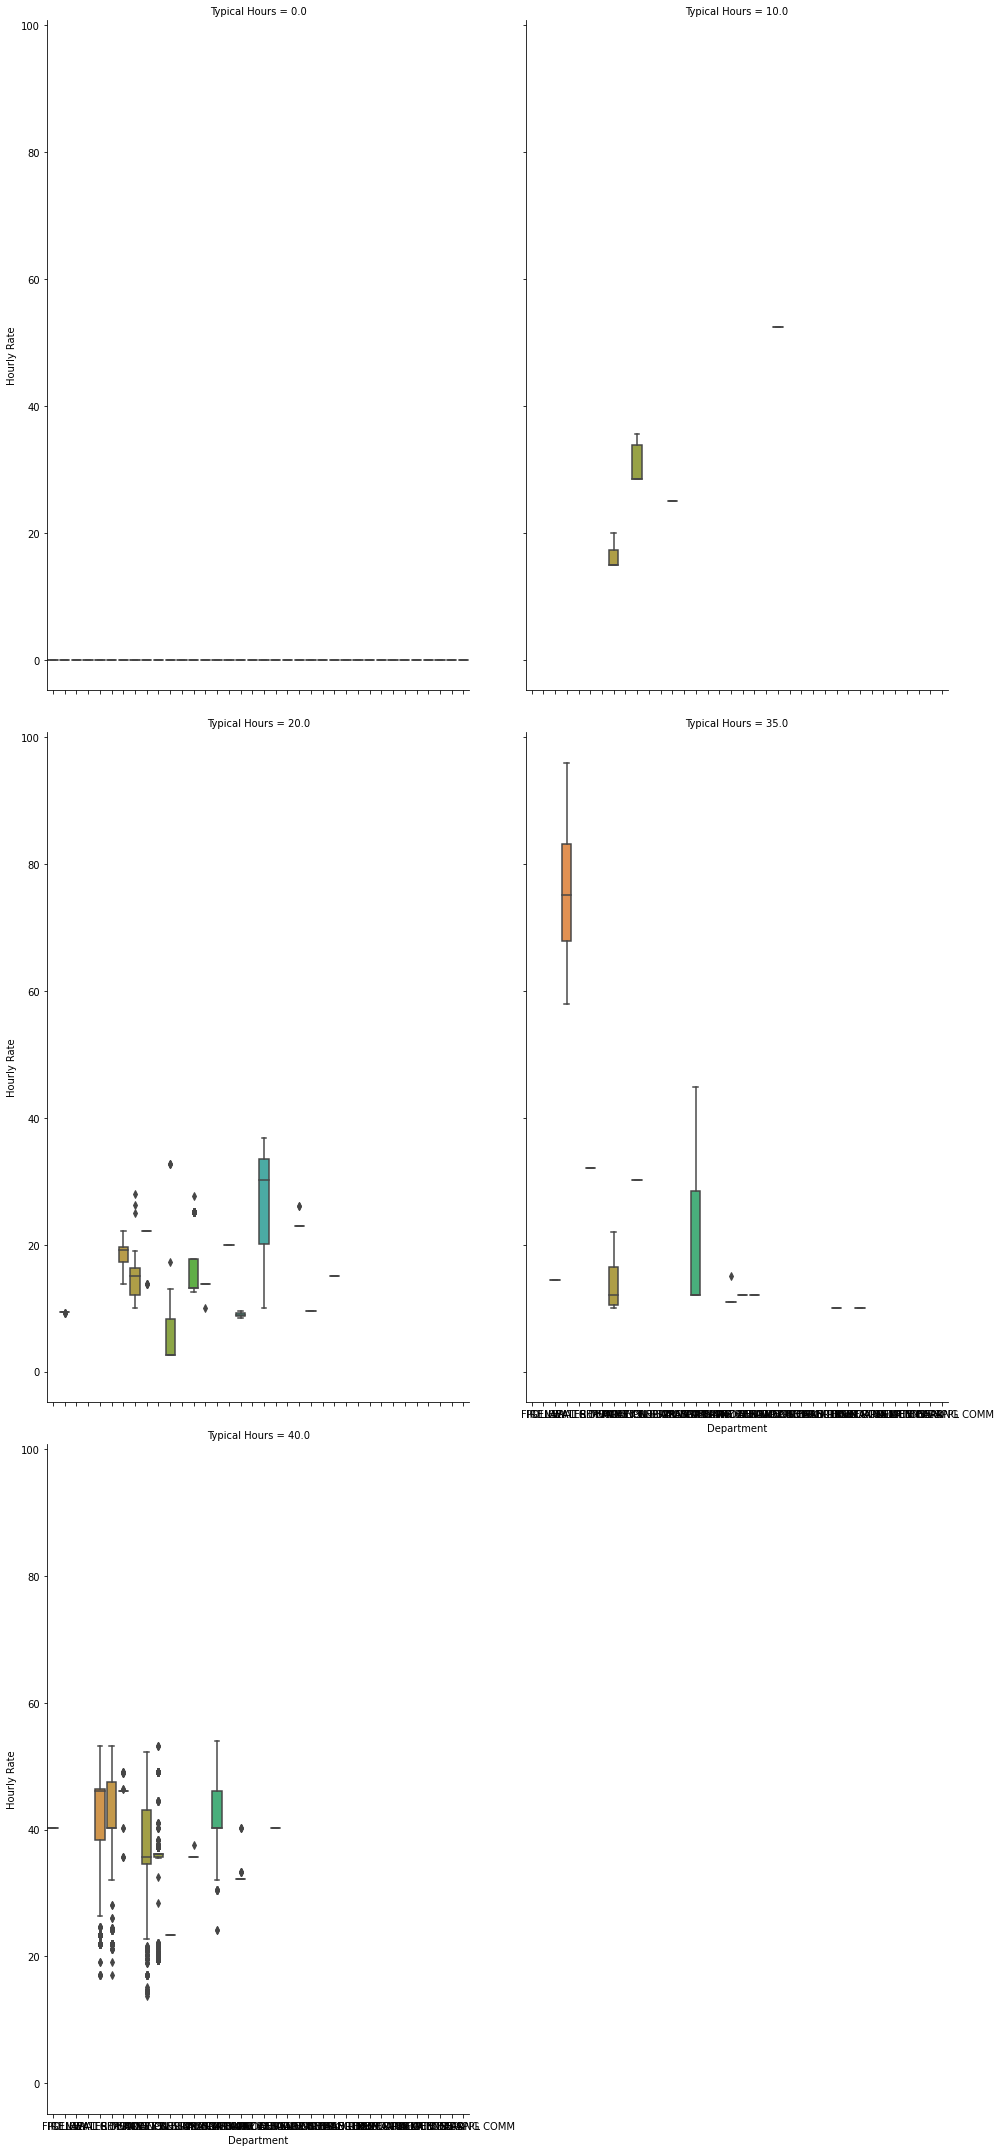

In [15]:
g = sns.factorplot(x="Department", y="Hourly Rate",col="Typical Hours",data=chi_payroll, kind="box",\
        col_wrap=2,size=10, aspect=.7)

/usr/local/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 432x288 with 0 Axes>

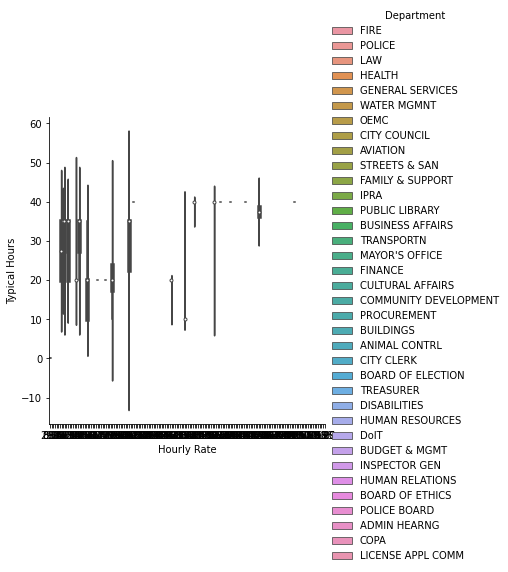

In [16]:
f1=plt.figure()
g = sns.factorplot(x="Hourly Rate",y="Typical Hours",hue='Department',data=chi_payroll, kind="violin")

In [18]:
f2=pt.figure()
f2.set_size_inches(20, 10)
g = sns.violinplot(y='Annual Salary',x='Department',data=chi_payroll)
plt.xticks(rotation=45)

NameError: name 'pt' is not defined